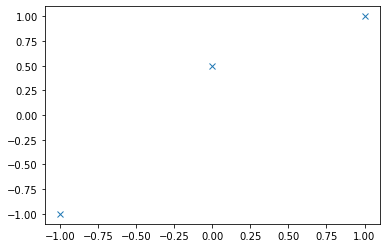

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd

# define a matrix
A = np.array([[-1, -1], [0, 0.5], [1, 1]])
# print(A)

# SVD
U, s, VT = svd(A)
# print(U)
# print(s)
# print(VT)

plt.plot(A[:,0],A[:,1],'x')
plt.show()


In [4]:
# dict structure
# {
#     'A': {
#         'matrix': np.array(),
#         'U': np.array(),
#         's': np.array(),
#         'VT': np.array(),
#     },
#     # ...
# }

In [7]:
# original matrices
A = np.array([[-1, -1], [0, 0.5], [1, 1]])
B = np.array([[-1, 1], [0, 0.5], [1, -1]])
C = np.array([[-1, -1], [0, 0.5], [1, -1]])

# where to store svd
dict_svd = {}

# svd decomposition
for matrix, matrix_name in zip([A, B, C], ["A", "B", "C"]):
    U, s, VT = svd(matrix)

    svd_decomposition = {
        'matrix': matrix,
        'U': U,
        's': s,
        'VT': VT,
    }

    dict_svd[matrix_name] = svd_decomposition.copy()

In [8]:
dict_svd

{'A': {'matrix': array([[-1. , -1. ],
         [ 0. ,  0.5],
         [ 1. ,  1. ]]),
  'U': array([[-6.95642561e-01, -1.26812566e-01,  7.07106781e-01],
         [ 1.79340051e-01, -9.83787145e-01,  9.48853707e-17],
         [ 6.95642561e-01,  1.26812566e-01,  7.07106781e-01]]),
  's': array([2.03197009, 0.34799074]),
  'VT': array([[ 0.68469764,  0.72882724],
         [ 0.72882724, -0.68469764]])},
 'B': {'matrix': array([[-1. ,  1. ],
         [ 0. ,  0.5],
         [ 1. , -1. ]]),
  'U': array([[-6.95642561e-01,  1.26812566e-01,  7.07106781e-01],
         [-1.79340051e-01, -9.83787145e-01, -9.48853707e-17],
         [ 6.95642561e-01, -1.26812566e-01,  7.07106781e-01]]),
  's': array([2.03197009, 0.34799074]),
  'VT': array([[ 0.68469764, -0.72882724],
         [-0.72882724, -0.68469764]])},
 'C': {'matrix': array([[-1. , -1. ],
         [ 0. ,  0.5],
         [ 1. , -1. ]]),
  'U': array([[ 0.66666667, -0.70710678,  0.23570226],
         [-0.33333333,  0.        ,  0.94280904],
     

In [17]:
# plot of matrices
import plotly.graph_objects as go
from plotly.subplots import make_subplots


# init plot
fig = make_subplots(
    rows=1, 
    cols=4
)


col = 1
for matrix_name, svd_decomp in dict_svd['A'].items():
    if matrix_name == 's':
        continue
    # matrix
    matrix = svd_decomp

    # plot
    fig.add_trace(
        go.Scatter(
            x=matrix[:, 0],
            y=matrix[:, 1],
            name=matrix_name,
            mode="markers",
            marker_size=10
        ),
    row=1, col=col)

    col += 1

# fig.update_layout(
#     title="Plot of matrices",
#     height=600,
#     width=600,
#     xaxis_range=[-2, 2],
#     yaxis_range=[-2, 2],
# )

fig.show()

In [24]:

fig = make_subplots(
    rows=1,
    cols=3,
    subplot_titles=list(dict_svd.keys())
)


col = 1
for matrix_name, svd_decomp in dict_svd.items():
    # matrix
    matrix = svd_decomp["matrix"]
    VT = svd_decomp["VT"]

    fig.add_trace(
        go.Scatter(
            x=matrix[:, 0],
            y=matrix[:, 1],
            mode="markers",
            name=matrix_name
        ),
    row=1, col=col)

    col += 1

fig.update_layout(
    xaxis_range=[-2, 2],
    yaxis_range=[-2, 2],
)
fig.show()

In [21]:
def draw_line(vec, x=[-2, 2]):
    return [vec[1] / vec[0] * i for i in x]